<a href="https://colab.research.google.com/github/feliciamargareta/hypothesis-testing-for-two-unpaired-group/blob/main/Python_Project_Hypothesis_Testing_with_Men's_and_Women's_Soccer_Matches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official FIFA World Cup matches (not including qualifiers) since 2002-01-01.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: women_results.csv and men_results.csv.

The question you are trying to determine the answer to is:

Are more goals scored in women's international soccer matches than men's?

You assume a 10% significance level, and use the following null and alternative hypotheses:

H_0 : The mean number of goals scored in women's international soccer matches is the same as men's.

H_A : The mean number of goals scored in women's international soccer matches is greater than men's.

In [ ]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt

# install & import pingouin package
!pip install pingouin
import pingouin

# 1. Exploratory Data Analysis
Load the data from men_results.csv and women_results.csv to understand its contents.

In [2]:
# Load men's and women's datasets
men = pd.read_csv('men_results.csv')
women = pd.read_csv('women_results.csv')

In [ ]:
# check datatype
print(men.info())
print(women.info())

by checking the datatype, we notice that the 'date' column in men and women dataset is wrong, let's change the datatype to datetime type

In [4]:
# change date to datetime type
men['date']=pd.to_datetime(men['date'])
women['date'] = pd.to_datetime(women['date'])

#2. Filtering the data
Filter the data to only include official FIFA World Cup matches that took place after 2002-01-01.


In [5]:
men_subset = men[(men['tournament'].isin(['FIFA World Cup'])) &(men['date']>'2002-01-01') ]
women_subset = women[(women['tournament'].isin(['FIFA World Cup'])) &(women['date']>'2002-01-01') ]
print(men_subset.head())
print(women_subset.head())

       Unnamed: 0       date            home_team     away_team  home_score  \
25164       25164 2002-05-31               France       Senegal           0   
25165       25165 2002-06-01              Germany  Saudi Arabia           8   
25166       25166 2002-06-01  Republic of Ireland      Cameroon           1   
25167       25167 2002-06-01              Uruguay       Denmark           1   
25168       25168 2002-06-02            Argentina       Nigeria           1   

       away_score      tournament  
25164           1  FIFA World Cup  
25165           0  FIFA World Cup  
25166           1  FIFA World Cup  
25167           2  FIFA World Cup  
25168           0  FIFA World Cup  
      Unnamed: 0       date      home_team    away_team  home_score  \
1600        1600 2003-09-20        Nigeria  North Korea           0   
1601        1601 2003-09-20         Norway       France           2   
1602        1602 2003-09-20        Germany       Canada           4   
1603        1603 2003-09-

# 3. Choosing the correct hypothesis
Use EDA to determine the appropriate hypothesis test for this dataset and scenario.

We know that the data we want to test coming from 2 independent groups 'men' & 'women', in this scenario, we need to use unpaired two sample test
for parametric test, we can use unpaired t-test --> but this need to follow 3 assumption:
- randomness
- independent
- sample size large enough (depends on the test)
- the distribution following normal distribution.

if the assumption is failed to complete, we can use the non-parametric test which is Wilcoxon-Mann Whitney Test

In [6]:
# checking the sample size of each sample
print(men_subset.shape)
print(women_subset.shape)

(384, 7)
(200, 7)


The sample size for each group is >30, which is large enough to use t-test.
let's check the normality of the total score by plotting the histogram

<ipython-input-7-8d36ccea8f65>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men_subset['total_score'] = men_subset['home_score']+men_subset['away_score']
<ipython-input-7-8d36ccea8f65>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women_subset['total_score'] = women_subset['home_score']+women_subset['away_score']


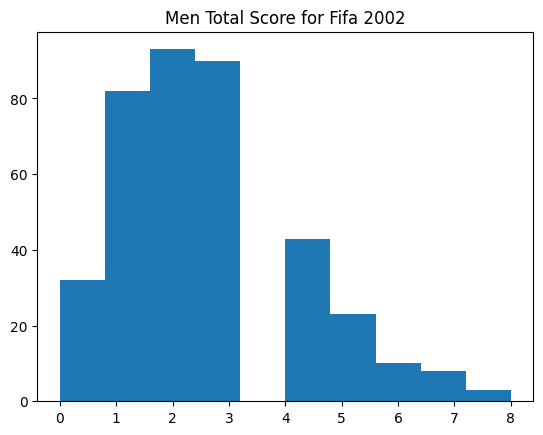

In [7]:
# checking the normality of the data
men_subset['total_score'] = men_subset['home_score']+men_subset['away_score']
women_subset['total_score'] = women_subset['home_score']+women_subset['away_score']

plt.hist(men_subset['total_score'])
plt.title('Men Total Score for Fifa 2002')
plt.show()

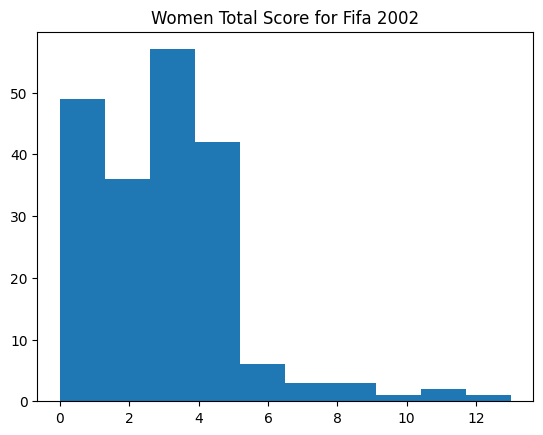

<Figure size 640x480 with 0 Axes>

In [8]:
plt.hist(women_subset['total_score'])
plt.title('Women Total Score for Fifa 2002')
plt.show()
plt.clf()


from the histogram distribution above, we can see clearly that women total score is right skewed, and there's a gap in the men's distribution, which is not normally distributed.
since the normality is failed, so it's better to use non-parametric Wilcoxon Mann Whitney Test instead.

# 4. Performing Hypothesis Test
to apply the MWU test, we need to combine the data into 1 dataframe & transform the long format to wide format data.

In [ ]:
# adding group column to differentiate men and women data set
men_subset['group'] = 'men'
women_subset['group'] = 'women'

# Combine men & women dataset
fifa_combine = pd.concat([men_subset,women_subset], axis = 0, ignore_index= True )

In [10]:
# create a subset to only select group and totalscore
fifa_comb_subset = fifa_combine[['group','total_score']]

# transform the data to the wide format
fifa_comb_pivot = fifa_comb_subset.pivot(columns = 'group', values = 'total_score')
print(fifa_comb_pivot)

group  men  women
0      1.0    NaN
1      8.0    NaN
2      2.0    NaN
3      3.0    NaN
4      1.0    NaN
..     ...    ...
579    NaN    3.0
580    NaN    3.0
581    NaN    1.0
582    NaN    3.0
583    NaN    2.0

[584 rows x 2 columns]


In [11]:
# Now the data format is already appropriate to applied the hypothesis test MWU

result_mwu = pingouin.mwu(
    x = fifa_comb_pivot['women'],
    y = fifa_comb_pivot['men'],
    alternative = 'greater'
)
print(result_mwu)

       U-val alternative     p-val       RBC      CLES
MWU  43273.0     greater  0.005107 -0.126901  0.563451


In [16]:
# Extract p-value as a float
p_val = result_mwu['p-val'].values[0]
print(f'p-value: {p_val}')

p-value: 0.005106609825443641


# 5. Interpreting the result of the hypothesis test
Interpret the p-value to determine if there is statistical significance between the two groups, assuming a 10% significance level.

In [20]:
# Determine hypothesis test result using sig. level
alpha = 0.1 #known from the instruction
if p_val <= alpha:
    result = 'reject'
    conclusion = "The mean number of goals scored in women's international soccer matches is greater than men's."
else:
    result = 'fail to reject'
    conclusion = "The mean number of goals scored in women's international soccer matches is as same as men's."

In [22]:
result_dict = {'p_val': p_val, 'result':result}
print(f"Since the p-value of {p_val} < alpha of {alpha}, so we {result} the null hypothesis.")
print(f"We can conclude that {conclusion}")

Since the p-value of 0.005106609825443641 < alpha of 0.1, so we reject the null hypothesis.
We can conclude that The mean number of goals scored in women's international soccer matches is greater than men's.
